In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 122.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import seaborn as sns
import math
import matplotlib
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import date, datetime, time
from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
np.warnings.filterwarnings('ignore')
from sklearn import preprocessing
from math import sqrt
from sklearn.linear_model import LinearRegression


In [ ]:
tata=pd.read_csv('TCS.csv')

In [ ]:
print(tata.head())

         Date Symbol Series  Prev Close    Open    High     Low    Last  \
0  2004-08-25    TCS     EQ      850.00  1198.7  1198.7  979.00  985.00   
1  2004-08-26    TCS     EQ      987.95   992.0   997.0  975.30  976.85   
2  2004-08-27    TCS     EQ      979.00   982.4   982.4  958.55  961.20   
3  2004-08-30    TCS     EQ      962.65   969.9   990.0  965.00  986.40   
4  2004-08-31    TCS     EQ      986.75   986.5   990.0  976.00  987.80   

    Close     VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  987.95  1008.32  17116372  1.725876e+15     NaN             5206360   
1  979.00   985.65   5055400  4.982865e+14     NaN             1294899   
2  962.65   969.94   3830750  3.715586e+14     NaN              976527   
3  986.75   982.65   3058151  3.005106e+14     NaN              701664   
4  988.10   982.18   2649332  2.602133e+14     NaN              695234   

   %Deliverble  
0       0.3042  
1       0.2561  
2       0.2549  
3       0.2294  
4       0.2624  


In [ ]:
tata.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323


In [ ]:
tata['company'] = 'Tata'
tata.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,company
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042,Tata
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561,Tata
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549,Tata
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294,Tata
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624,Tata


In [ ]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
 15  company             4139 non-null   object 
dtypes: flo

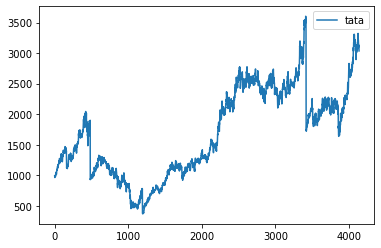

In [ ]:
plt.plot(tata.Close, label='tata')
plt.legend()

In [ ]:
#moving average
ma_day=[1000]
for ma in ma_day:
  tata1 = tata['Close'].to_frame()
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 1000
tata1['SMA30'] = tata['Close'].rolling(ma).mean()
tata.dropna(inplace=True)


In [ ]:
tata.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,company
1683,2011-06-01,TCS,EQ,1157.15,1157.0,1177.00,1157.00,1174.7,1175.40,1171.25,491193,5.753106e+13,24427.0,235463,0.4794,Tata
1684,2011-06-02,TCS,EQ,1175.40,1158.9,1172.00,1156.65,1170.0,1167.75,1163.45,848827,9.875700e+13,31879.0,505320,0.5953,Tata
1685,2011-06-03,TCS,EQ,1167.75,1166.0,1175.00,1150.00,1153.0,1152.10,1157.15,683904,7.913794e+13,21179.0,416548,0.6091,Tata
1686,2011-06-06,TCS,EQ,1152.10,1140.0,1168.00,1140.00,1167.0,1164.35,1156.70,678537,7.848626e+13,20965.0,373937,0.5511,Tata
1687,2011-06-07,TCS,EQ,1164.35,1163.0,1183.15,1158.00,1180.0,1179.30,1175.19,918721,1.079673e+14,26487.0,598039,0.6509,Tata


In [ ]:
tata1.head()

,Close,SMA30
0,987.95,NaN
1,979.00,NaN
2,962.65,NaN
3,986.75,NaN
4,988.10,NaN


In [ ]:
tata1.dropna(inplace=True)

In [ ]:
tata1.head()

,Close,SMA30
999,817.85,1244.28590
1000,819.00,1244.11695
1001,818.20,1243.95615
1002,834.05,1243.82755
1003,818.45,1243.65925


In [ ]:
#Daily returns
tata['DR'] = tata['Close'].pct_change()

In [ ]:
adj_closing_df = pd.concat([ tata['Close']], axis=1)
adj_closing_df.columns = ['tata']
adj_closing_df = adj_closing_df.pct_change()
adj_closing_df.dropna(inplace=True)
adj_closing_df.head()

,tata
1684,-0.006508
1685,-0.013402
1686,0.010633
1687,0.012840
1688,0.001781


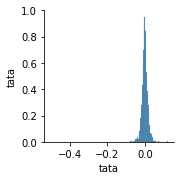

In [ ]:
sns.pairplot(adj_closing_df, kind='reg')

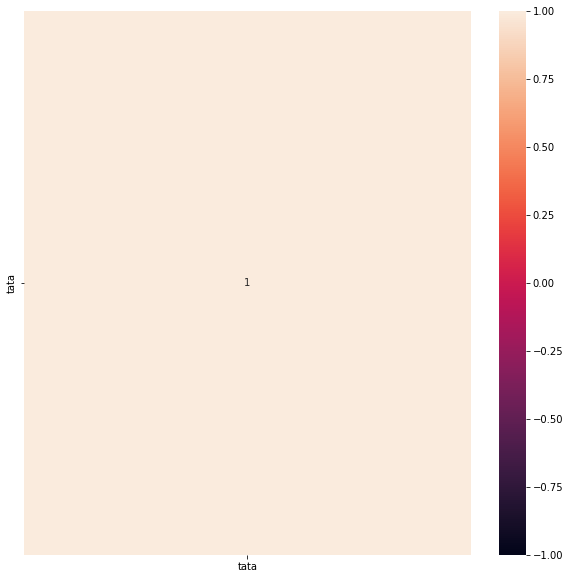

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(adj_closing_df.corr(), vmin=-1, vmax=1, annot=True)

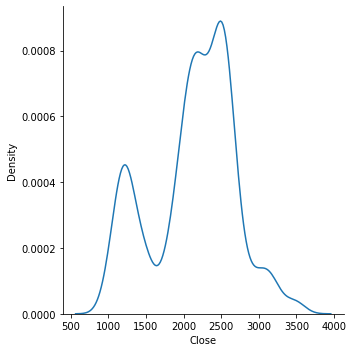

In [ ]:
sns.displot(tata.Close, kind='kde')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
tata_close = tata.Close.values
tata_close[:30]
tata_close

array([1175.4 , 1167.75, 1152.1 , ..., 3124.1 , 3115.25, 3035.65])

In [ ]:
data = tata1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.85 ))

training_data_len

2669

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  7.241199854880002e-17
Standard deviation of processed data:  0.9999999999999998


In [ ]:
test_size=len(data)-training_data_len

In [ ]:
test_size,training_data_len

(471, 2669)

In [ ]:
data

,Close
999,817.85
1000,819.00
1001,818.20
1002,834.05
1003,818.45
...,...
4134,3100.80
4135,3132.00
4136,3124.10
4137,3115.25


In [ ]:
dataset.shape

(3140, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.13938617],
       [0.13974143],
       [0.13949429],
       ...,
       [0.85184041],
       [0.84910644],
       [0.82451615]])

In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2609, 60, 1)

In [ ]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(scaled_data)):
    xtrain.append(scaled_data[i-60:i,0])
    ytrain.append(scaled_data[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (2609, 60, 1)
x_train shape after reshaping (2609, 60, 1)


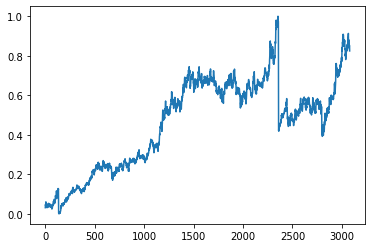

In [ ]:
plt.plot(ytrain)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from keras.layers import LSTM

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

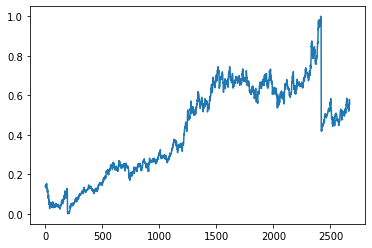

In [ ]:
plt.plot(train_data)

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
82/82 [==============================] - 29s 278ms/step - loss: 0.0076
Epoch 2/20
82/82 [==============================] - 14s 176ms/step - loss: 8.2050e-04
Epoch 3/20
82/82 [==============================] - 14s 175ms/step - loss: 7.2956e-04
Epoch 4/20
82/82 [==============================] - 14s 174ms/step - loss: 8.2584e-04
Epoch 5/20
82/82 [==============================] - 14s 174ms/step - loss: 7.3328e-04
Epoch 6/20
82/82 [==============================] - 14s 176ms/step - loss: 6.0839e-04
Epoch 7/20
82/82 [==============================] - 14s 174ms/step - loss: 6.5636e-04
Epoch 8/20
82/82 [==============================] - 16s 198ms/step - loss: 7.3713e-04
Epoch 9/20
82/82 [==============================] - 14s 175ms/step - loss: 4.9685e-04
Epoch 10/20
82/82 [==============================] - 14s 174ms/step - loss: 5.2113e-04
Epoch 11/20
82/82 [==============================] - 14s 174ms/step - loss: 5.3145e-04
Epoch 12/20
82/82 [==============================] - 14s

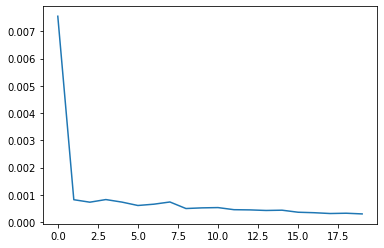

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
test_data.shape

(531, 1)

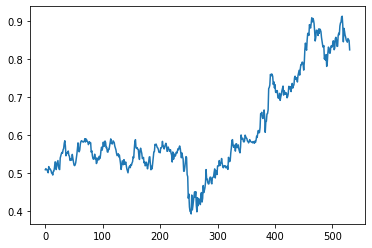

In [ ]:
plt.plot(test_data)

In [ ]:
#convert the data to numpy
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

15/15 [==============================] - 2s 58ms/step
[[2155.0515]
 [2146.2065]
 [2175.5564]
 [2208.4045]
 [2228.6113]
 [2230.6604]
 [2227.8044]
 [2221.9373]
 [2219.8396]
 [2225.3801]
 [2240.4329]
 [2232.118 ]
 [2240.1506]
 [2241.7288]
 [2233.3071]
 [2227.1074]
 [2209.9329]
 [2208.6606]
 [2218.9653]
 [2217.4114]
 [2218.0103]
 [2171.2788]
 [2150.8708]
 [2122.4653]
 [2095.775 ]
 [2082.899 ]
 [2084.2397]
 [2110.7673]
 [2104.0579]
 [2101.5908]
 [2070.3613]
 [2057.565 ]
 [2074.032 ]
 [2088.166 ]
 [2084.9294]
 [2098.015 ]
 [2094.8137]
 [2102.17  ]
 [2135.27  ]
 [2169.2395]
 [2168.0505]
 [2174.8066]
 [2203.278 ]
 [2198.4336]
 [2189.1025]
 [2210.3418]
 [2217.727 ]
 [2190.9263]
 [2176.7458]
 [2150.131 ]
 [2136.7488]
 [2148.7935]
 [2159.574 ]
 [2182.5364]
 [2213.2507]
 [2243.9575]
 [2231.6748]
 [2218.7344]
 [2208.1448]
 [2219.301 ]
 [2223.3523]
 [2220.656 ]
 [2200.657 ]
 [2178.9917]
 [2161.5151]
 [2138.9495]
 [2117.9014]
 [2115.478 ]
 [2123.708 ]
 [2114.0774]
 [2116.4343]
 [2097.9172]
 [2064.893

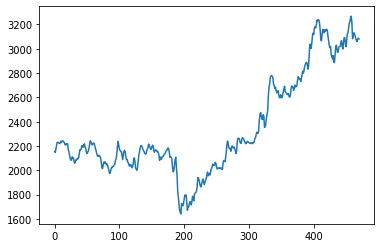

In [ ]:
plt.plot(predictions)

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

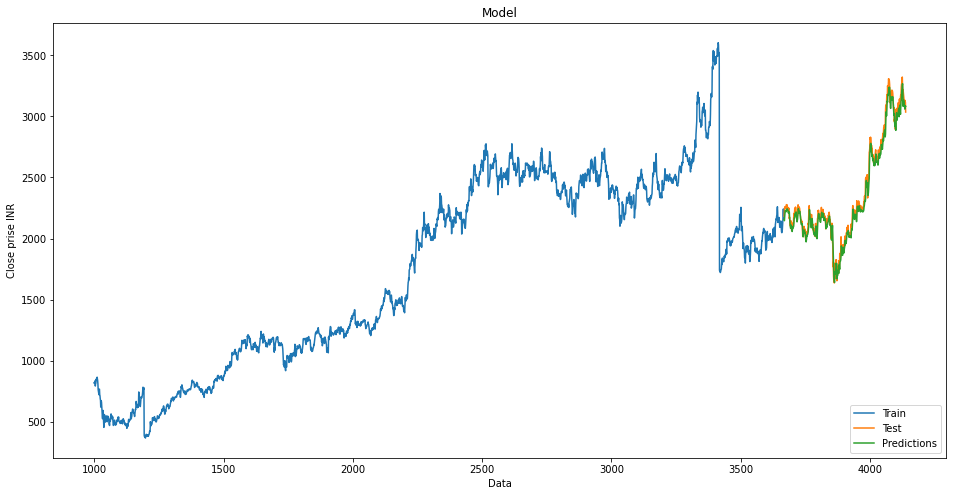

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()


In [ ]:
df5 = pd.DataFrame({'Actual': y_test.flatten() , 'Predicted' : predictions.flatten()})
print(df5)

      Actual    Predicted
0    2181.75  2155.051514
1    2231.50  2146.206543
2    2252.80  2175.556396
3    2260.90  2208.404541
4    2254.10  2228.611328
..       ...          ...
466  3100.80  3067.698975
467  3132.00  3059.602783
468  3124.10  3080.568848
469  3115.25  3087.703613
470  3035.65  3081.637207

[471 rows x 2 columns]


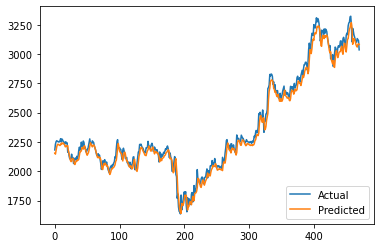

In [ ]:
plt.plot(df5)
plt.legend(['Actual','Predicted'],loc='lower right')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted = model.predict(x_test)
print(r2_score(y_test,predicted))

15/15 [==============================] - 1s 58ms/step
-31.475645854034894


In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7707908.76291049

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df5 = pd.DataFrame({'Targeted': y_test.flatten(), 'Predicted' : predicted.flatten()})
df5

,Targeted,Predicted
0,1452.45,1530.512274
1,1443.80,1532.978835
2,1427.70,1545.502619
3,1404.50,1531.782994
4,1422.25,1546.090658
...,...,...
1940,3100.80,3018.449174
1941,3132.00,3023.495399
1942,3124.10,2965.993767
1943,3115.25,2970.403369


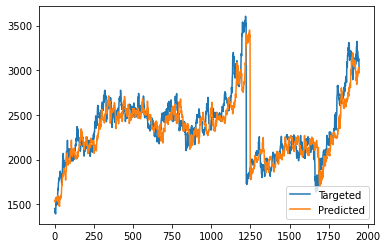

In [ ]:
plt.plot(df5)
plt.legend(['Targeted','Predicted'],loc='lower right')

In [ ]:
#LINEAR REGRESSION

In [ ]:
#Seperating 'Open','Close', and 'Volume' columns for prediction
dfreg = tata.loc[:,['Close']]

In [ ]:
forecast_out = int(math.ceil(0.01* len(dfreg)))
dfreg['label'] = dfreg['Close'].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [ ]:
training_data_len = int(np.ceil( len(dataset) * 0.85 ))

training_data_len


2669

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dfreg)

scaled_data

array([[0.0958241 , 0.09857949],
       [0.09297563, 0.10345726],
       [0.08714836, 0.09442779],
       ...,
       [0.82142126,        nan],
       [0.81812597,        nan],
       [0.78848696,        nan]])

In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])


In [ ]:
# Feature selection
x_train=[]
y_train=[]
for i in range(60,len(scaled_data)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
len(x_train)

2396

In [ ]:
len(x_test)

2188

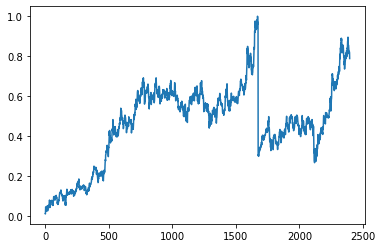

In [ ]:
plt.plot(y_train)   #training plot

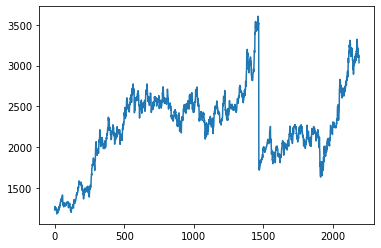

In [ ]:
plt.plot(y_test)

In [ ]:
x_test,y_test

(array([[-1.6235695 ],
        [-1.62160998],
        [-1.6282011 ],
        ...,
        [ 1.60510011],
        [ 1.62950508],
        [ 1.77103604]]),
 array([1235.1 , 1246.7 , 1258.85, ..., 3124.1 , 3115.25, 3035.65]))

In [ ]:
model = LinearRegression()
model.fit(dfreg)

NameError: ignored

In [ ]:
predicted = regressor.predict(x_test)
print(r2_score(y_test,predicted))

NotFittedError: ignored

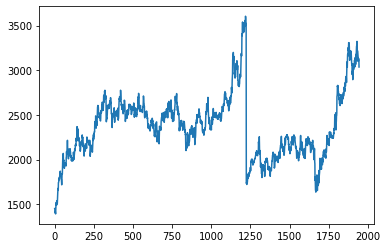

In [ ]:
plt.plot(y_test) #testing plot

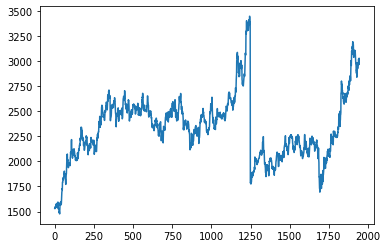

In [ ]:
plt.plot(predicted)    #error testing plot

In [ ]:
df5 = pd.DataFrame({'Targeted': y_test.flatten(), 'Predicted' : predicted.flatten()})
df5.head(259)

,Targeted,Predicted
0,1452.45,1530.512274
1,1443.80,1532.978835
2,1427.70,1545.502619
3,1404.50,1531.782994
4,1422.25,1546.090658
...,...,...
254,2310.55,2093.559527
255,2307.65,2120.545860
256,2399.55,2134.253763
257,2425.40,2157.595729


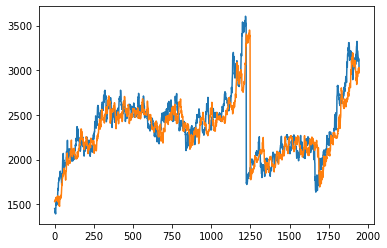

In [ ]:
plt.plot(df5)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))
plt.figure(figsize=(10,4))

Mean Absolute Error: 149.40676178727193
Root Mean Squared Error: 248.41125285060974


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

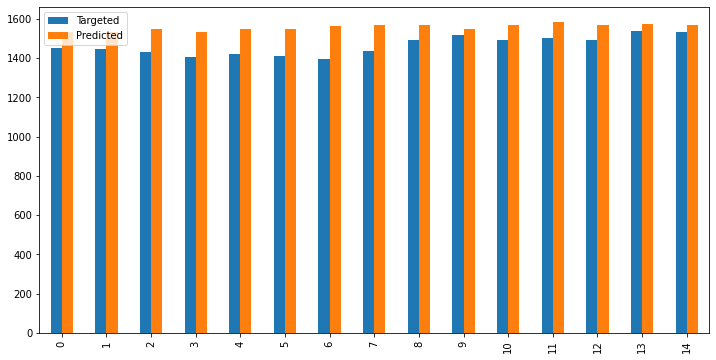

In [ ]:
graph = df5.head(15)
graph.plot(kind='bar',figsize=(12,6))

In [ ]:
#linear regression finall

In [ ]:
import numpy as np   #Linear algera Library
import pandas as pd
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
from sklearn.linear_model import LinearRegression   #for linear regression model
sns.set()  #setting seaborn as default
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("TCS.csv")   #reads the input data
data.head()

,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.730000e+15,NaN,5206360,0.3042
1,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.980000e+14,NaN,1294899,0.2561
2,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.720000e+14,NaN,976527,0.2549
3,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.010000e+14,NaN,701664,0.2294
4,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.600000e+14,NaN,695234,0.2624


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                4139 non-null   float64
 1   High                4139 non-null   float64
 2   Low                 4139 non-null   float64
 3   Last                4139 non-null   float64
 4   Close               4139 non-null   float64
 5   VWAP                4139 non-null   float64
 6   Volume              4139 non-null   int64  
 7   Turnover            4139 non-null   float64
 8   Trades              2456 non-null   float64
 9   Deliverable Volume  4139 non-null   int64  
 10  %Deliverble         4139 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 355.8 KB


In [ ]:
data.describe(include ='all')

,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.951922e+14,85502.709283,8.952206e+05,0.549429
std,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.850321e+14,56031.488595,8.637908e+05,0.132867
min,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370000e+12,1219.000000,7.765000e+03,0.121400
25%,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050000e+14,46749.500000,4.334740e+05,0.459100
50%,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.820000e+14,68901.000000,7.052640e+05,0.553800
75%,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455000e+14,110630.250000,1.136132e+06,0.646850
max,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.270000e+16,542541.000000,3.155626e+07,0.962200


In [ ]:
data.isnull().sum() # No null values

Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [ ]:
data.head()

,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.730000e+15,NaN,5206360,0.3042
1,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.980000e+14,NaN,1294899,0.2561
2,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.720000e+14,NaN,976527,0.2549
3,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.010000e+14,NaN,701664,0.2294
4,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.600000e+14,NaN,695234,0.2624


In [ ]:
data['Trades'].dropna()

1683     24427.0
1684     31879.0
1685     21179.0
1686     20965.0
1687     26487.0
          ...   
4134     87012.0
4135     97077.0
4136     76017.0
4137     98275.0
4138    157829.0
Name: Trades, Length: 2456, dtype: float64

In [ ]:
data.head()

,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.730000e+15,NaN,5206360,0.3042
1,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.980000e+14,NaN,1294899,0.2561
2,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.720000e+14,NaN,976527,0.2549
3,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.010000e+14,NaN,701664,0.2294
4,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.600000e+14,NaN,695234,0.2624


In [ ]:
x=data[['High','Low','Last','Open','Turnover']].values   #input
y=data[['Close']].values

In [ ]:
from sklearn.model_selection import train_test_split
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

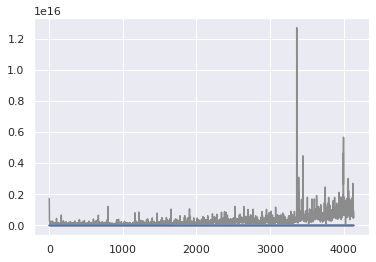

In [ ]:
plt.plot(data)

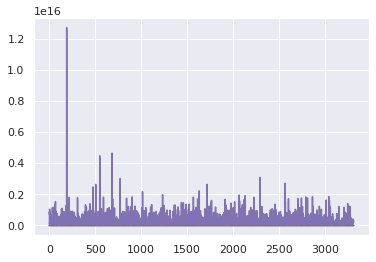

In [ ]:
plt.plot(x_train)

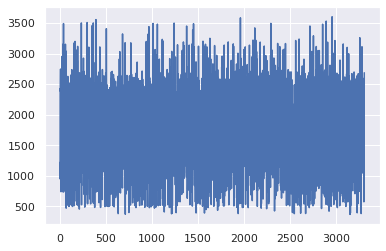

In [ ]:
plt.plot(y_train)

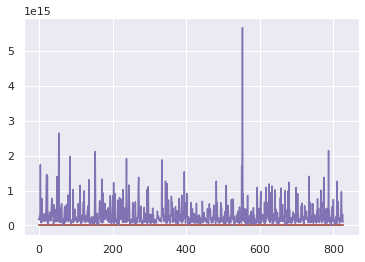

In [ ]:
plt.plot(x_test)

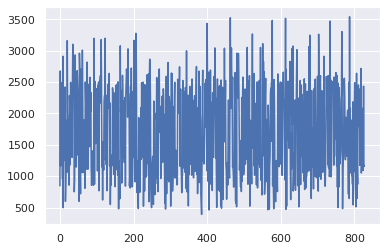

In [ ]:
plt.plot(y_test)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([[ 1.02616098e-01,  9.49815474e-02,  8.73273319e-01,
        -7.10525642e-02, -3.88578059e-16]])

In [ ]:
lm.score(x_train,y_train)

0.9999668823029092

In [ ]:
predictions = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9999691414308963

In [ ]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'target':y_test.flatten(),'Predicted':predictions.flatten()})
#flatten toget single axis of data (1 dimension only)

In [ ]:
dframe.head(15)

,target,Predicted
0,844.40,847.654779
1,2675.25,2676.828799
2,1165.95,1164.678967
3,2310.35,2310.516363
4,2488.40,2486.403897
5,1797.15,1799.782776
6,1676.75,1675.948929
7,953.95,955.942064
8,2909.30,2910.889483
9,496.75,496.940020


Text(0, 0.5, 'Closing price')

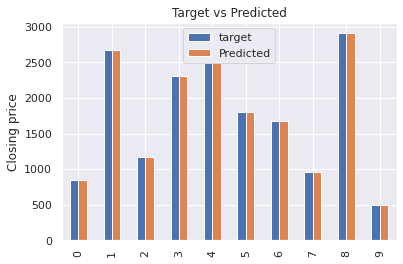

In [ ]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Target vs Predicted')
plt.ylabel('Closing price')

In [ ]:
import math
from sklearn import metrics

In [ ]:
#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 2.9112734923236356
Mean squared value: 16.37522588394652
root mean squared error value: 4.046631424277051
